In [20]:
import pandas as pd
import numpy as np

# **Load Data**

<Axes: xlabel='TARGET'>

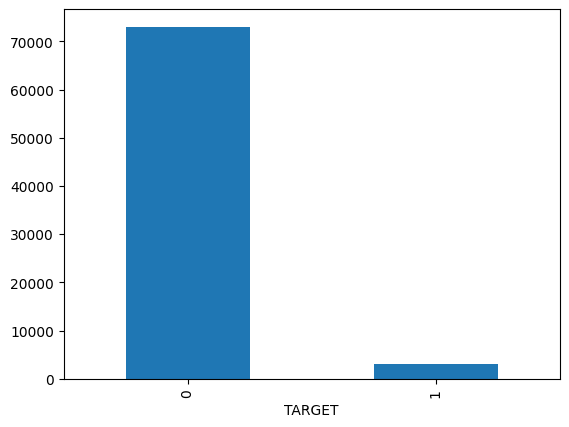

In [21]:
df = pd.read_csv('../data/santander-customer-satisfaction/train.csv')
df['TARGET'].value_counts().plot(kind='bar')


In [22]:
num0 = df['TARGET'].value_counts()[0]
num1 = df['TARGET'].value_counts()[1]
print('0이 차지하는 비율은 {0}입니다'.format(np.round(num0/(num0+num1),4)))

0이 차지하는 비율은 0.9604입니다


# **Preprocessing**

In [23]:
df = df[df['var3']>-999999]
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


# **Remove Outliers**

In [24]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    
    df= df[(df[col]<q3+1.5*iqr)&(df[col]>q1-1.5*iqr)]

In [25]:

for col in df.columns:
    remove_outliers(df, col)

df    

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


# **Split Data & HyperOpt Using Stratified KFold**

In [26]:
from sklearn.model_selection import StratifiedKFold
from hyperopt import hp
from hyperopt import Trials, tpe, fmin
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [27]:
X.shape

(75904, 370)

In [28]:

search_space = {
    'n_estimators':400,
    'max_depth':hp.quniform('max_depth',5,15,1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'min_child_weight':hp.quniform('min_child_weight',1,6,1),
    'min_split_loss':hp.uniform('min_split_loss',0,2),
    'colsample_bytree':hp.uniform('colsample_bytree',0.5,0.95)    
}

def objective_function(search_space):
    xgb_clf = XGBClassifier(
        n_estimators=search_space['n_estimators'],
        max_depth=int(search_space['max_depth']),
        learning_rate=search_space['learning_rate'],
        min_child_weight=search_space['min_child_weight'],
        min_split_loss=search_space['min_split_loss'],
        colsample_bytree=search_space['colsample_bytree']
    )
    xgb_clf.set_params(eval_metric='auc', early_stopping_rounds=30)
    
    kfold = StratifiedKFold(n_splits=5)
    roc_auc_list=[]
    
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        xgb_clf.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)])
        y_pred = xgb_clf.predict(X_test)
        
        score = roc_auc_score(y_test, y_pred)
        roc_auc_list.append(score)
    
    return -1*np.mean(roc_auc_list)


In [29]:
trial_val = Trials()
    
best= fmin(fn=objective_function,
              space=search_space,
                algo=tpe.suggest,
                max_evals=50,
                trials=trial_val,
                rstate=np.random.default_rng(seed=9))
    
    

print(f'best : {best}')

[0]	validation_0-auc:0.83728	validation_1-auc:0.81848 
[1]	validation_0-auc:0.84036	validation_1-auc:0.82114 
[2]	validation_0-auc:0.84028	validation_1-auc:0.81372 
[3]	validation_0-auc:0.84433	validation_1-auc:0.81908 
[4]	validation_0-auc:0.84691	validation_1-auc:0.82211 
[5]	validation_0-auc:0.84739	validation_1-auc:0.82328 
[6]	validation_0-auc:0.84565	validation_1-auc:0.81863 
[7]	validation_0-auc:0.84750	validation_1-auc:0.82099 
[8]	validation_0-auc:0.84738	validation_1-auc:0.82211 
[9]	validation_0-auc:0.84925	validation_1-auc:0.82415 
[10]	validation_0-auc:0.84794	validation_1-auc:0.81992
[11]	validation_0-auc:0.84914	validation_1-auc:0.82144
[12]	validation_0-auc:0.84987	validation_1-auc:0.82247
[13]	validation_0-auc:0.85069	validation_1-auc:0.82404
[14]	validation_0-auc:0.85116	validation_1-auc:0.82433
[15]	validation_0-auc:0.85153	validation_1-auc:0.82480
[16]	validation_0-auc:0.85180	validation_1-auc:0.82528
[17]	validation_0-auc:0.85190	validation_1-auc:0.82418
[18]	valid

# **Modeling**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_train, X_test,  y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=1)

xgb_clf = XGBClassifier(n_estimators=400,
                        colsample_bytree=best['colsample_bytree'],
                        learning_rate=best['learning_rate'],
                        max_depth=int(best['max_depth']),
                        min_child_weight=best['min_child_weight'],
                        min_split_loss=best['min_split_loss']
                    , early_stopping_rounds=30, eval_metric='auc')
xgb_clf.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)])
y_pred_prob = xgb_clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

[0]	validation_0-auc:0.84858	validation_1-auc:0.82568
[1]	validation_0-auc:0.86140	validation_1-auc:0.82890
[2]	validation_0-auc:0.86622	validation_1-auc:0.82437
[3]	validation_0-auc:0.87239	validation_1-auc:0.83081
[4]	validation_0-auc:0.87795	validation_1-auc:0.83480
[5]	validation_0-auc:0.88290	validation_1-auc:0.83612
[6]	validation_0-auc:0.88360	validation_1-auc:0.83423
[7]	validation_0-auc:0.88788	validation_1-auc:0.83703
[8]	validation_0-auc:0.88891	validation_1-auc:0.83566
[9]	validation_0-auc:0.89255	validation_1-auc:0.83208
[10]	validation_0-auc:0.89341	validation_1-auc:0.83123
[11]	validation_0-auc:0.89917	validation_1-auc:0.83363
[12]	validation_0-auc:0.90059	validation_1-auc:0.83289
[13]	validation_0-auc:0.90416	validation_1-auc:0.83581
[14]	validation_0-auc:0.90665	validation_1-auc:0.83654
[15]	validation_0-auc:0.90903	validation_1-auc:0.83700
[16]	validation_0-auc:0.91111	validation_1-auc:0.83683
[17]	validation_0-auc:0.91324	validation_1-auc:0.83509
[18]	validation_0-au

np.float64(0.8370883347142051)

In [31]:
test = pd.read_csv('/kaggle/input/santander-customer-satisfaction/test.csv')
test = test[test['var3']>-999999]
test = test.drop('ID', axis=1)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/santander-customer-satisfaction/test.csv'

In [ ]:
for col in test.columns:
    remove_outliers(test, col)
test
